In [1]:
import pandas as pd

# Load the dataset to see its contents
file_path = 'clinical.ESTIMATE_result01A.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,gender,age_at_index,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_pathologic_n,ajcc_pathologic_m,StromalScore,ImmuneScore,ESTIMATEScore,TumorPurity
0,TCGA-73-4658-01A,female,80.0,Stage I,T2,N0,M0,1533.969153,2310.885931,3844.855084,0.390734
1,TCGA-55-8615-01A,male,67.0,Stage III,T3,N2,MX,-495.422683,317.133447,-178.289236,0.837111
2,TCGA-97-8177-01A,female,59.0,Stage I,T2,N0,M0,1194.468179,2139.474151,3333.942330,0.458605
3,TCGA-67-3771-01A,female,77.0,Stage I,T1,N0,M0,530.719810,1667.123393,2197.843203,0.599752
4,TCGA-49-6744-01A,female,64.0,Stage II,T2,N1,MX,1328.812971,2414.404992,3743.217963,0.404423


In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Prepare the data
data_filtered = data[['ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'ImmuneScore', 'StromalScore', 'ESTIMATEScore']]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Define categories for TNM staging that are comparable to the image
stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
t_order = ['T1', 'T2', 'T3', 'T4']
n_order = ['N0', 'N1', 'N2', 'N3']
m_order = ['M0', 'M1']


In [5]:

# Function to calculate p-values and add to the boxplot
def create_boxplot_with_pval(data, x_col, y_col, order, title, ylabel):
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
    
    # Calculate p-values
    unique_groups = data[x_col].dropna().unique()
    if len(unique_groups) > 2:
        # For more than 2 groups, use Kruskal-Wallis test
        groups = [data[data[x_col] == group][y_col].dropna() for group in unique_groups]
        p_val = stats.kruskal(*groups).pvalue
    else:
        # For 2 groups, use Mann-Whitney U test
        group1 = data[data[x_col] == unique_groups[0]][y_col].dropna()
        group2 = data[data[x_col] == unique_groups[1]][y_col].dropna()
        p_val = stats.mannwhitneyu(group1, group2).pvalue
    
    # Add p-value to the plot
    ax.text(0.5, max(data[y_col]) * 1.05, f'p = {p_val:.3f}', ha='center', size=12)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    return ax


/tmp/ipykernel_41907/868607279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/868607279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/868607279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/868607279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

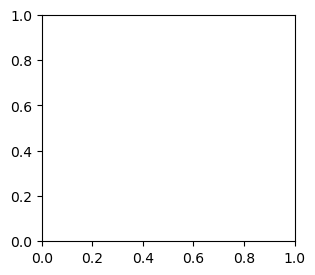

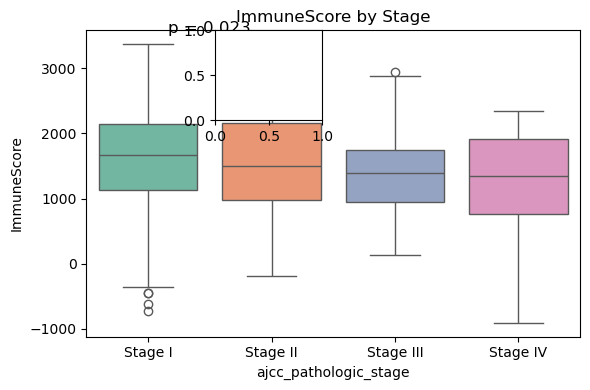

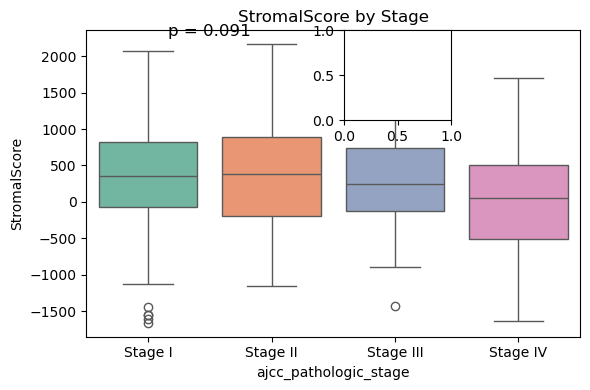

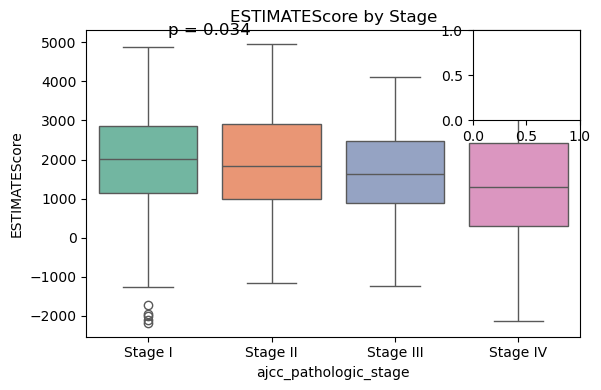

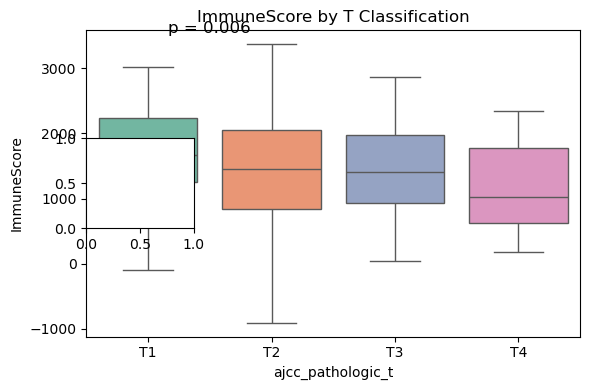

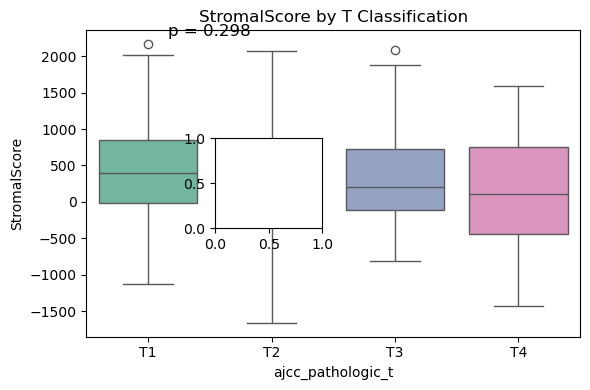

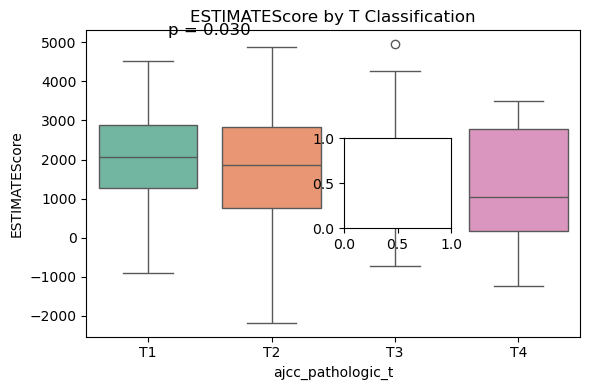

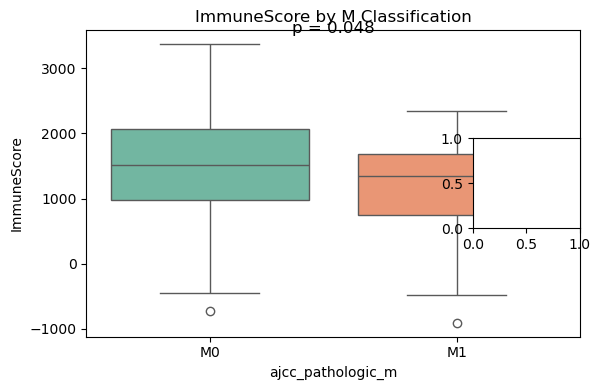

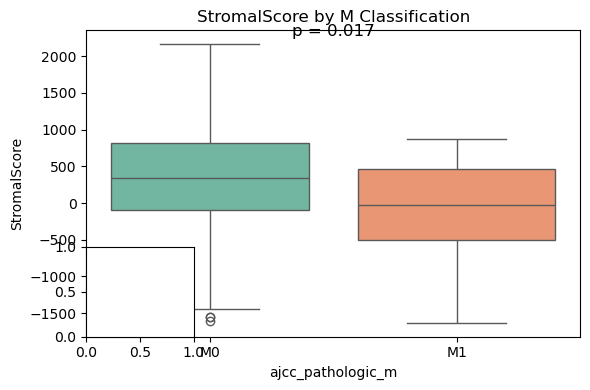

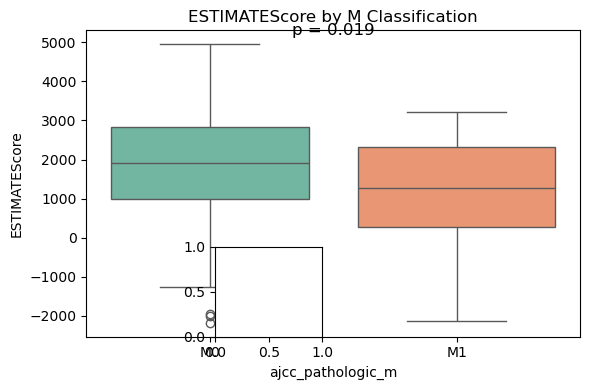

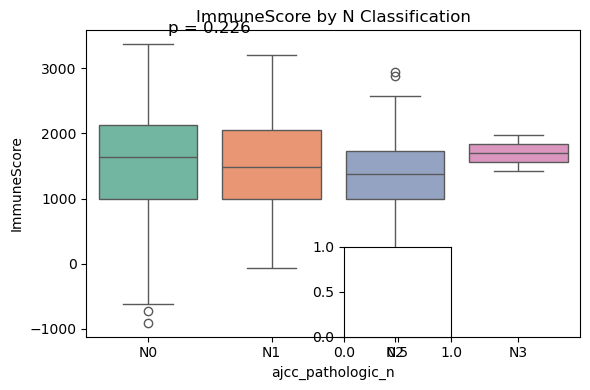

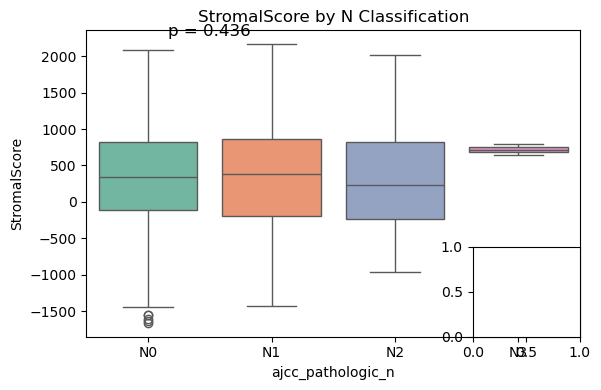

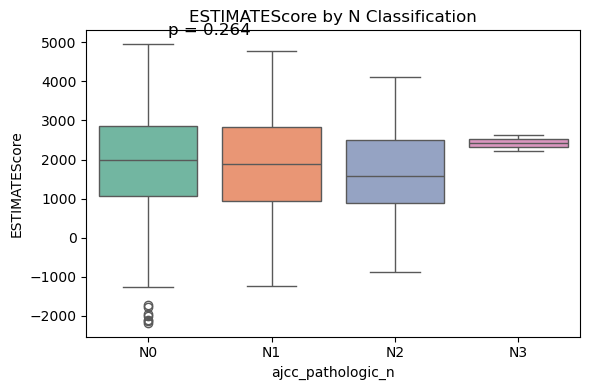

In [6]:

# Create plots with p-values

plt.figure(figsize=(15, 10))

# ImmuneScore vs Stage
plt.subplot(3, 4, 1)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_stage', 'ImmuneScore', stage_order, 'ImmuneScore by Stage', 'ImmuneScore')

# StromalScore vs Stage
plt.subplot(3, 4, 2)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_stage', 'StromalScore', stage_order, 'StromalScore by Stage', 'StromalScore')

# ESTIMATEScore vs Stage
plt.subplot(3, 4, 3)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_stage', 'ESTIMATEScore', stage_order, 'ESTIMATEScore by Stage', 'ESTIMATEScore')

# ImmuneScore vs T classification
plt.subplot(3, 4, 4)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_t', 'ImmuneScore', t_order, 'ImmuneScore by T Classification', 'ImmuneScore')

# StromalScore vs T classification
plt.subplot(3, 4, 5)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_t', 'StromalScore', t_order, 'StromalScore by T Classification', 'StromalScore')

# ESTIMATEScore vs T classification
plt.subplot(3, 4, 6)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_t', 'ESTIMATEScore', t_order, 'ESTIMATEScore by T Classification', 'ESTIMATEScore')

# ImmuneScore vs M classification
plt.subplot(3, 4, 7)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_m', 'ImmuneScore', m_order, 'ImmuneScore by M Classification', 'ImmuneScore')

# StromalScore vs M classification
plt.subplot(3, 4, 8)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_m', 'StromalScore', m_order, 'StromalScore by M Classification', 'StromalScore')

# ESTIMATEScore vs M classification
plt.subplot(3, 4, 9)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_m', 'ESTIMATEScore', m_order, 'ESTIMATEScore by M Classification', 'ESTIMATEScore')

# ImmuneScore vs N classification
plt.subplot(3, 4, 10)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_n', 'ImmuneScore', n_order, 'ImmuneScore by N Classification', 'ImmuneScore')

# StromalScore vs N classification
plt.subplot(3, 4, 11)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_n', 'StromalScore', n_order, 'StromalScore by N Classification', 'StromalScore')

# ESTIMATEScore vs N classification
plt.subplot(3, 4, 12)
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_n', 'ESTIMATEScore', n_order, 'ESTIMATEScore by N Classification', 'ESTIMATEScore')

plt.tight_layout()
plt.show()


/tmp/ipykernel_41907/3531019063.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/3531019063.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/3531019063.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
/tmp/ipykernel_41907/3531019063.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is de

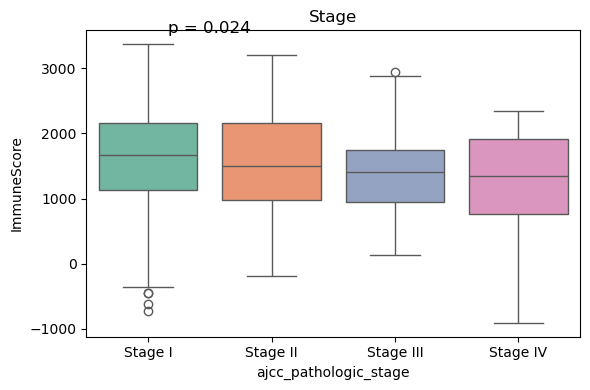

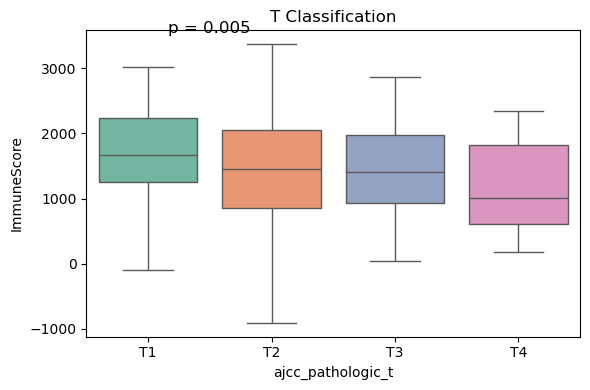

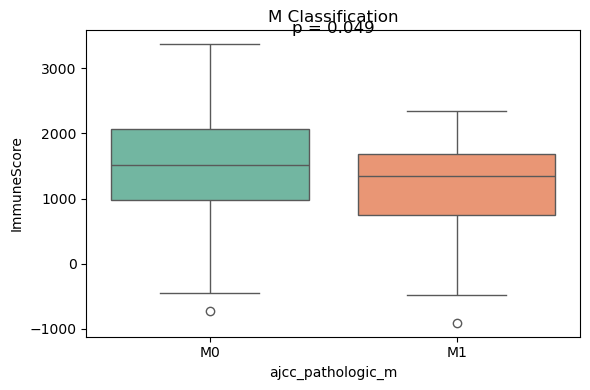

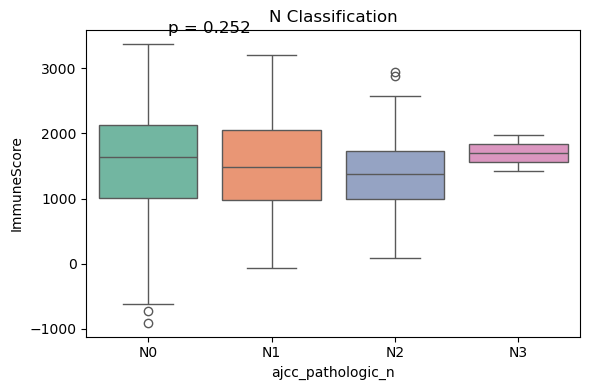

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
file_path = 'clinical.ESTIMATE_result01A.csv'

data = pd.read_csv(file_path)

# Prepare the data: filter relevant columns
data_filtered = data[['ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'ImmuneScore', 'StromalScore', 'ESTIMATEScore']]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Define categories for sorting TNM staging and Stage classifications
stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
t_order = ['T1', 'T2', 'T3', 'T4']
n_order = ['N0', 'N1', 'N2', 'N3']
m_order = ['M0', 'M1']

# Function to calculate p-values and add to the boxplot
def create_boxplot_with_pval(data, x_col, y_col, order, title, ylabel):
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='Set2')
    
    # Calculate p-values
    unique_groups = data[x_col].dropna().unique()
    if len(unique_groups) > 2:
        # For more than 2 groups, use Kruskal-Wallis test
        groups = [data[data[x_col] == group][y_col].dropna() for group in unique_groups]
        p_val = stats.kruskal(*groups).pvalue
    else:
        # For 2 groups, use Mann-Whitney U test
        group1 = data[data[x_col] == unique_groups[0]][y_col].dropna()
        group2 = data[data[x_col] == unique_groups[1]][y_col].dropna()
        p_val = stats.mannwhitneyu(group1, group2).pvalue
    
    # Add p-value to the plot
    ax.text(0.5, max(data[y_col]) * 1.05, f'p = {p_val:.3f}', ha='center', size=12)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.tight_layout()
    return ax

# Create boxplots for each classification with p-values
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_stage', 'ImmuneScore', stage_order, 'Stage', 'ImmuneScore')
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_t', 'ImmuneScore', t_order, 'T Classification', 'ImmuneScore')
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_m', 'ImmuneScore', m_order, 'M Classification', 'ImmuneScore')
create_boxplot_with_pval(data_filtered, 'ajcc_pathologic_n', 'ImmuneScore', n_order, 'N Classification', 'ImmuneScore')

plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the gene signature data
file_path = 'COX/gene_sig.csv'
gene_sig = pd.read_csv(file_path)

# Check the first few rows of the dataset to ensure it's loaded properly
gene_sig.head()

# Convert the necessary columns to numeric if not already
gene_sig['HR'] = pd.to_numeric(gene_sig['HR'], errors='coerce')
gene_sig['lower'] = pd.to_numeric(gene_sig['lower'], errors='coerce')
gene_sig['upper'] = pd.to_numeric(gene_sig['upper'], errors='coerce')

# Define a function to plot the forest plot in Python
def plot_forestplot(df, hr_col, lower_col, upper_col, labels_col, title="Hazard Ratios"):
    # Sort values to ensure order
    df = df.sort_values(hr_col, ascending=False)
    
    # Create the figure and the axis
    fig, ax = plt.subplots(figsize=(8, len(df) * 0.5))
    
    # Plot horizontal lines representing confidence intervals
    ax.errorbar(df[hr_col], df[labels_col], xerr=[df[hr_col] - df[lower_col], df[upper_col] - df[hr_col]],
                fmt='o', color='teal', ecolor='lightcoral', elinewidth=2, capsize=4)
    
    # Plot a vertical line at HR = 1
    ax.axvline(x=1, linestyle='--', color='black', lw=1)
    
    # Set labels and title
    ax.set_xlabel('Hazard Ratio')
    ax.set_ylabel('Genes')
    plt.title(title)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Use the function to plot the forest plot
plot_forestplot(df=gene_sig, hr_col='HR', lower_col='lower', upper_col='upper', labels_col='gene')


FileNotFoundError: [Errno 2] No such file or directory: 'COX/gene_sig.csv'